In [1]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore", module="matplotlib")

from __future__ import division

import os, sys
import numpy as np
import pandas as pd
import datetime as dt
import random as rd

from IPython.display import display

import libdecimate

In [2]:
import ezvis3d as v3d

Open console to check js libs were loaded in page


In [3]:
#Display a nx3 array as a 3d plot using ezvis3d
def display_rgb(rgb_array):
    li_data = []

    for i in range(rgb_array.shape[0]):
        r,g,b = rgb_array[i,:]
        style = '#%02x%02x%02x' % (r,g,b)
        li_data.append({'x': r, 'y': g, 'z': b, 'style': style})
    
    df_data = pd.DataFrame(li_data)

    g = v3d.Vis3d()
    g.width = '100%'
    g.height = '800px'
    g.style = 'dot-color'
    g.xLabel = 'Red (channel 0)'
    g.yLabel = 'Green (channel 1)'
    g.zLabel = 'Blue (channel 2)'
    g.showPerspective = False
    g.showShadow = False
    g.showGrid = True
    g.showLegend = False
    g.keepAspectRatio = True
    g.verticalRatio = 1.0
    g.dotSizeRatio = 0.001
    #g.legendLabel = 'distance'
    g.cameraPosition = {'horizontal' : 0.8,
                        'vertical': 0.5,
                        'distance': 2
                       }

    return g, df_data

In [4]:
import tifffile

tif = tifffile.TiffFile("RD5 - dLGN Slide 1 Section 1 (2).lif - TileScan_001.tif")
arr = tif.asarray()
arr.shape

(84L, 3L, 1024L, 1024L)

In [5]:
import libpat

D:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
D:\Anaconda2\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# Check what the data looks like

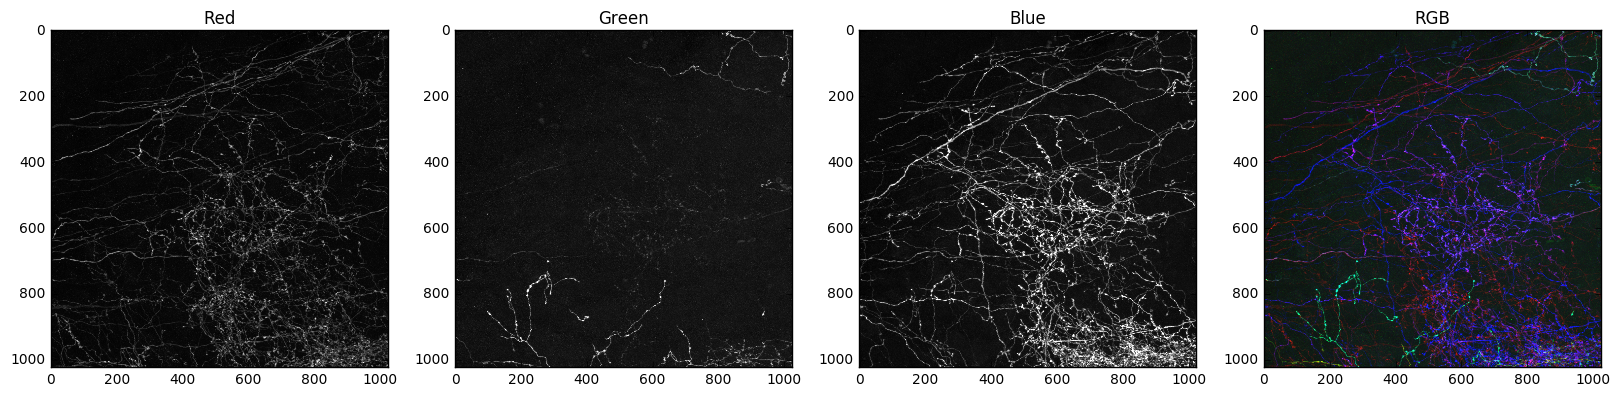

In [6]:
r = arr[:,0]
g = arr[:,1]
b = arr[:,2]

dataset = libpat.Image()
dataset.set_data([r,g,b])
dataset.display()

# Choose a small region to work with (200x200x84)

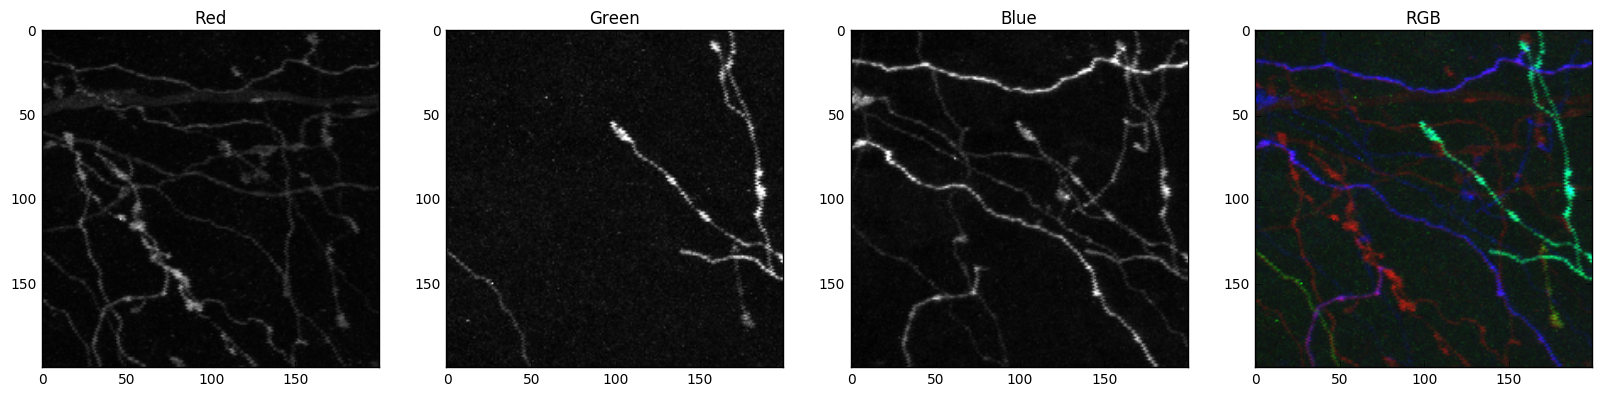

In [7]:
r = arr[:,0,800:1000,0:200]
g = arr[:,1,800:1000,0:200]
b = arr[:,2,800:1000,0:200]

dataset = libpat.Image()
dataset.set_data([r,g,b])
dataset.display()

In [8]:
#reducing intensities from 16 bit to 8 bit
rgb = libdecimate.decimate(r,g,b,16,8)
g, df_data = display_rgb(rgb)
g.plot(df_data)

# Clean the data

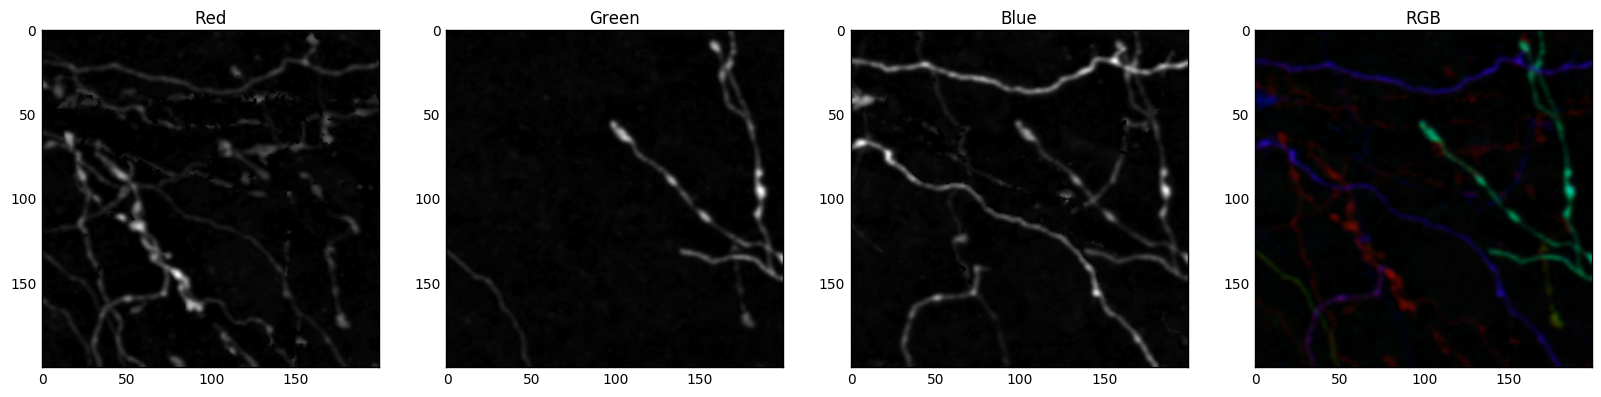

In [9]:
dataset.clean(threshold=500,lowscale=2,nscales=4) #10% of maxval
dataset.display()

In [10]:
r = dataset.r.astype(np.uint16)
g = dataset.g.astype(np.uint16)
b = dataset.b.astype(np.uint16)

rgb = libdecimate.decimate(r,g,b,16,8)
g,df_data = display_rgb(rgb)
g.plot(df_data)